# README

Dear TA, because of my carelessness, I realized that we are expected to implement Problem 2.1 in Tensorflow and Keras at the time when I have finished implementation in PyTorch.

The place where the Tensorflow and Kera is used is in the second half of this .ipynb file, please see the end.

Thanks a lot!

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torchvision.datasets import MNIST,FashionMNIST
from torchvision import transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
data_train = MNIST(root = "data/", 
          transform = transform, ## 图像变换操作
          train =True, ## 决定使用训练集还是测试集
          download = True) ## 选择是否需要下载数据
data_test = MNIST(root = "data/",
          transform = transform,
          train =False)

In [3]:
print(len(data_train))
print(len(data_test))

60000
10000


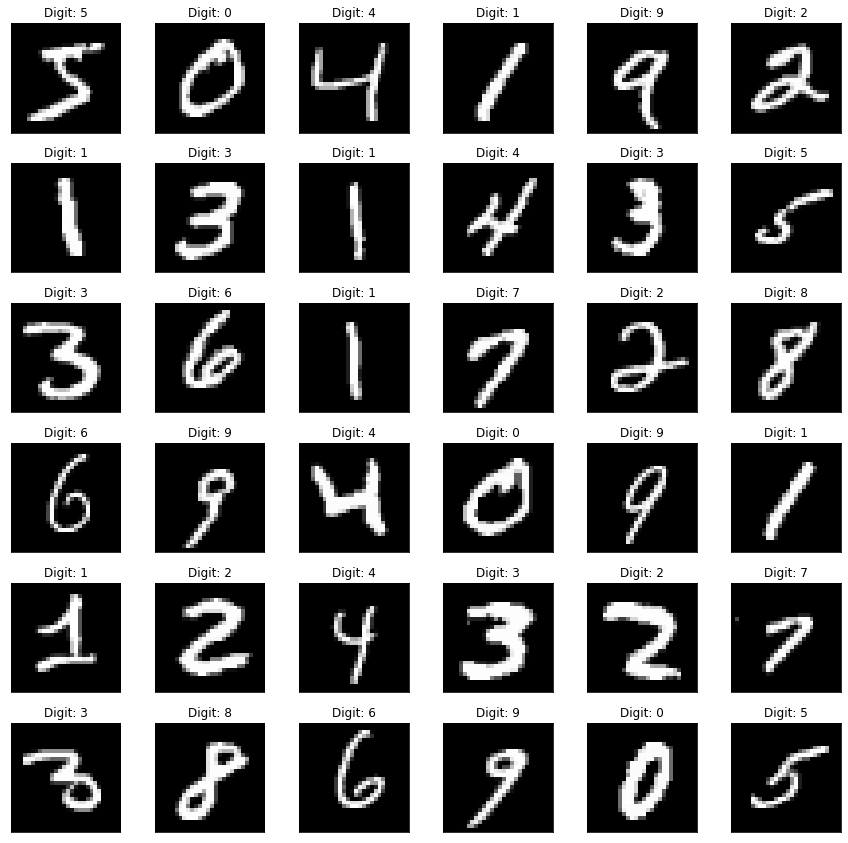

In [4]:
fig = plt.figure(figsize=(12, 12))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.tight_layout()
    plt.imshow(data_train[i][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(data_train[i][1]))
    plt.xticks([])
    plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

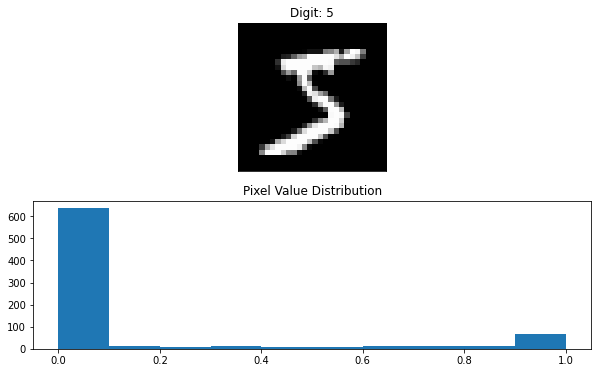

In [5]:
fig = plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.imshow(data_train[0][0].numpy().reshape(28,28), cmap='gray', interpolation='none')
plt.title("Digit: {}".format(data_train[0][1]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(data_train[0][0].numpy().reshape(784))
plt.title("Pixel Value Distribution")

In [6]:
batch_size = 256

In [7]:
train_loader = Data.DataLoader(dataset=data_train,
                batch_size=batch_size,
                shuffle=True)
test_loader = Data.DataLoader(dataset=data_test,
                batch_size=batch_size,
                shuffle=True)

In [8]:
mlp = nn.Sequential(nn.Flatten(),
           nn.Linear(784,512),
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,512),
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,512), 
           nn.ReLU(),
           nn.Dropout(p=0.2),
           nn.Linear(512,10))

In [9]:
lr, num_epochs = 0.001, 2000 ## 定义学习率及训练次数
optimizer = torch.optim.SGD(mlp.parameters(), lr = lr) ## 定义优化器
loss_func = nn.CrossEntropyLoss(reduction='mean') ## 定义损失函数，分类问题一般使用交叉熵损失

train_loss_all = []
train_acc_all = []
test_acc_all = []
test_loss_all = []

for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch+1,num_epochs))
    
    running_loss = 0.0
    running_correct = 0.0
    
    for X, y in train_loader:
        mlp.train() ## 表明模型在训练
        output = mlp.forward(X) ## 模型在 X 上的输出: N * num_class
        train_loss = loss_func(output, y ) ## 交叉熵误差
        _, pred = torch.max(output.data, 1) ## 获得预测结果
        optimizer.zero_grad() ## 每次迭代将梯度初始化为0
        train_loss.backward() ## 损失的后向传播， 计算梯度
        optimizer.step() ## 使用梯度进行优化
        running_loss += train_loss.item() ## 统计模型预测损失
        running_correct += torch.sum(pred == y.data) ## 统计模型预测准确个数
        
    test_correct = 0
    val_loss = 0
    for data in test_loader:
        X_test, y_test = data        
        output = mlp(X_test)
        test_loss = loss_func(output, y_test )
        _, pred = torch.max(output.data, 1)
        test_correct += torch.sum(pred == y_test.data)
        val_loss += test_loss.item()
    print("Loss is:{:.4f}, Train_accuracy is {:.4f}%, Test_accuracy is {:.4f}%"
          .format(running_loss/len(train_loader),100*running_correct/len(data_train), 100*test_correct/len(data_test)))
    print("="*80)
    train_loss_all.append(running_loss/len(train_loader))
    train_acc_all.append(running_correct/len(data_train))
    test_loss_all.append(val_loss/len(test_loader))
    test_acc_all.append(test_correct/len(data_test))

Epoch 1/2000
Loss is:2.3005, Train_accuracy is 12.8950%, Test_accuracy is 14.1800%
Epoch 2/2000
Loss is:2.2988, Train_accuracy is 14.9500%, Test_accuracy is 16.3100%
Epoch 3/2000
Loss is:2.2970, Train_accuracy is 16.8483%, Test_accuracy is 18.4700%
Epoch 4/2000
Loss is:2.2950, Train_accuracy is 18.7383%, Test_accuracy is 19.9600%
Epoch 5/2000
Loss is:2.2932, Train_accuracy is 20.3867%, Test_accuracy is 21.2600%
Epoch 6/2000
Loss is:2.2911, Train_accuracy is 22.2300%, Test_accuracy is 22.8700%
Epoch 7/2000
Loss is:2.2891, Train_accuracy is 24.0033%, Test_accuracy is 26.0900%
Epoch 8/2000
Loss is:2.2871, Train_accuracy is 26.3650%, Test_accuracy is 28.4200%
Epoch 9/2000
Loss is:2.2847, Train_accuracy is 29.2717%, Test_accuracy is 32.2500%
Epoch 10/2000
Loss is:2.2822, Train_accuracy is 32.4017%, Test_accuracy is 34.1600%
Epoch 11/2000
Loss is:2.2797, Train_accuracy is 35.1117%, Test_accuracy is 37.3000%
Epoch 12/2000
Loss is:2.2768, Train_accuracy is 37.6383%, Test_accuracy is 39.0500%
E

Loss is:0.9361, Train_accuracy is 73.3700%, Test_accuracy is 74.1200%
Epoch 52/2000
Loss is:0.9073, Train_accuracy is 73.9333%, Test_accuracy is 74.9700%
Epoch 53/2000
Loss is:0.8786, Train_accuracy is 74.5217%, Test_accuracy is 75.1300%
Epoch 54/2000
Loss is:0.8539, Train_accuracy is 74.9200%, Test_accuracy is 75.6500%
Epoch 55/2000
Loss is:0.8304, Train_accuracy is 75.5583%, Test_accuracy is 76.3800%
Epoch 56/2000
Loss is:0.8098, Train_accuracy is 76.0300%, Test_accuracy is 76.9200%
Epoch 57/2000
Loss is:0.7895, Train_accuracy is 76.4217%, Test_accuracy is 77.6300%
Epoch 58/2000
Loss is:0.7734, Train_accuracy is 76.8550%, Test_accuracy is 77.3300%
Epoch 59/2000
Loss is:0.7581, Train_accuracy is 77.2650%, Test_accuracy is 78.5100%
Epoch 60/2000
Loss is:0.7432, Train_accuracy is 77.6183%, Test_accuracy is 78.5400%
Epoch 61/2000
Loss is:0.7283, Train_accuracy is 78.0167%, Test_accuracy is 79.3000%
Epoch 62/2000
Loss is:0.7169, Train_accuracy is 78.4150%, Test_accuracy is 79.1600%
Epoch 

Loss is:0.4845, Train_accuracy is 85.4533%, Test_accuracy is 85.6800%
Epoch 102/2000
Loss is:0.4805, Train_accuracy is 85.6550%, Test_accuracy is 86.1000%
Epoch 103/2000
Loss is:0.4782, Train_accuracy is 85.7883%, Test_accuracy is 86.0300%
Epoch 104/2000
Loss is:0.4734, Train_accuracy is 85.8250%, Test_accuracy is 86.2100%
Epoch 105/2000
Loss is:0.4707, Train_accuracy is 86.0700%, Test_accuracy is 85.7600%
Epoch 106/2000
Loss is:0.4694, Train_accuracy is 86.2167%, Test_accuracy is 86.4600%
Epoch 107/2000
Loss is:0.4662, Train_accuracy is 86.1167%, Test_accuracy is 86.6700%
Epoch 108/2000
Loss is:0.4638, Train_accuracy is 86.2467%, Test_accuracy is 86.5600%
Epoch 109/2000
Loss is:0.4590, Train_accuracy is 86.4250%, Test_accuracy is 86.3500%
Epoch 110/2000
Loss is:0.4569, Train_accuracy is 86.5400%, Test_accuracy is 87.0000%
Epoch 111/2000
Loss is:0.4539, Train_accuracy is 86.4967%, Test_accuracy is 87.0400%
Epoch 112/2000
Loss is:0.4530, Train_accuracy is 86.6533%, Test_accuracy is 86.9

Loss is:0.3807, Train_accuracy is 88.9117%, Test_accuracy is 89.1800%
Epoch 152/2000
Loss is:0.3794, Train_accuracy is 88.9833%, Test_accuracy is 89.2400%
Epoch 153/2000
Loss is:0.3778, Train_accuracy is 88.9650%, Test_accuracy is 89.2300%
Epoch 154/2000
Loss is:0.3745, Train_accuracy is 88.9650%, Test_accuracy is 89.1800%
Epoch 155/2000
Loss is:0.3745, Train_accuracy is 89.1783%, Test_accuracy is 89.2100%
Epoch 156/2000
Loss is:0.3738, Train_accuracy is 89.2067%, Test_accuracy is 89.3800%
Epoch 157/2000
Loss is:0.3699, Train_accuracy is 89.3167%, Test_accuracy is 89.4900%
Epoch 158/2000
Loss is:0.3707, Train_accuracy is 89.2083%, Test_accuracy is 89.6000%
Epoch 159/2000
Loss is:0.3672, Train_accuracy is 89.3550%, Test_accuracy is 89.5200%
Epoch 160/2000
Loss is:0.3682, Train_accuracy is 89.2950%, Test_accuracy is 89.6000%
Epoch 161/2000
Loss is:0.3652, Train_accuracy is 89.4133%, Test_accuracy is 89.4900%
Epoch 162/2000
Loss is:0.3648, Train_accuracy is 89.2950%, Test_accuracy is 89.4

Loss is:0.3193, Train_accuracy is 90.6433%, Test_accuracy is 90.6600%
Epoch 202/2000
Loss is:0.3199, Train_accuracy is 90.7283%, Test_accuracy is 90.9200%
Epoch 203/2000
Loss is:0.3167, Train_accuracy is 90.7333%, Test_accuracy is 91.0700%
Epoch 204/2000
Loss is:0.3190, Train_accuracy is 90.6267%, Test_accuracy is 90.8800%
Epoch 205/2000
Loss is:0.3158, Train_accuracy is 90.8567%, Test_accuracy is 90.9800%
Epoch 206/2000
Loss is:0.3161, Train_accuracy is 90.7833%, Test_accuracy is 91.1700%
Epoch 207/2000
Loss is:0.3131, Train_accuracy is 90.9033%, Test_accuracy is 90.9300%
Epoch 208/2000
Loss is:0.3116, Train_accuracy is 90.8550%, Test_accuracy is 91.1200%
Epoch 209/2000
Loss is:0.3110, Train_accuracy is 90.9817%, Test_accuracy is 91.1200%
Epoch 210/2000
Loss is:0.3112, Train_accuracy is 90.9733%, Test_accuracy is 90.9900%
Epoch 211/2000
Loss is:0.3087, Train_accuracy is 91.0800%, Test_accuracy is 90.9600%
Epoch 212/2000
Loss is:0.3090, Train_accuracy is 91.0350%, Test_accuracy is 91.3

Loss is:0.2747, Train_accuracy is 91.9167%, Test_accuracy is 92.1700%
Epoch 252/2000
Loss is:0.2745, Train_accuracy is 92.0600%, Test_accuracy is 92.0300%
Epoch 253/2000
Loss is:0.2723, Train_accuracy is 92.1200%, Test_accuracy is 91.9500%
Epoch 254/2000
Loss is:0.2719, Train_accuracy is 92.1150%, Test_accuracy is 92.0800%
Epoch 255/2000
Loss is:0.2721, Train_accuracy is 92.0783%, Test_accuracy is 92.3600%
Epoch 256/2000
Loss is:0.2715, Train_accuracy is 92.0883%, Test_accuracy is 92.0500%
Epoch 257/2000
Loss is:0.2699, Train_accuracy is 92.1867%, Test_accuracy is 92.4300%
Epoch 258/2000
Loss is:0.2695, Train_accuracy is 92.1567%, Test_accuracy is 92.2400%
Epoch 259/2000
Loss is:0.2672, Train_accuracy is 92.2850%, Test_accuracy is 92.2700%
Epoch 260/2000
Loss is:0.2656, Train_accuracy is 92.2583%, Test_accuracy is 92.1100%
Epoch 261/2000
Loss is:0.2678, Train_accuracy is 92.3050%, Test_accuracy is 92.5100%
Epoch 262/2000
Loss is:0.2680, Train_accuracy is 92.1900%, Test_accuracy is 92.0

Loss is:0.2384, Train_accuracy is 93.1967%, Test_accuracy is 93.1900%
Epoch 302/2000
Loss is:0.2380, Train_accuracy is 93.0700%, Test_accuracy is 93.2300%
Epoch 303/2000
Loss is:0.2360, Train_accuracy is 93.1933%, Test_accuracy is 93.1900%
Epoch 304/2000
Loss is:0.2372, Train_accuracy is 93.0167%, Test_accuracy is 93.0800%
Epoch 305/2000
Loss is:0.2369, Train_accuracy is 93.1183%, Test_accuracy is 93.0200%
Epoch 306/2000
Loss is:0.2349, Train_accuracy is 93.2117%, Test_accuracy is 92.9400%
Epoch 307/2000
Loss is:0.2336, Train_accuracy is 93.2567%, Test_accuracy is 93.1500%
Epoch 308/2000
Loss is:0.2340, Train_accuracy is 93.1817%, Test_accuracy is 93.0000%
Epoch 309/2000
Loss is:0.2345, Train_accuracy is 93.1250%, Test_accuracy is 93.1200%
Epoch 310/2000
Loss is:0.2341, Train_accuracy is 93.2900%, Test_accuracy is 93.0900%
Epoch 311/2000
Loss is:0.2322, Train_accuracy is 93.2533%, Test_accuracy is 93.5100%
Epoch 312/2000
Loss is:0.2313, Train_accuracy is 93.3217%, Test_accuracy is 93.1

Loss is:0.2092, Train_accuracy is 93.9200%, Test_accuracy is 93.8800%
Epoch 352/2000
Loss is:0.2102, Train_accuracy is 93.8817%, Test_accuracy is 93.9100%
Epoch 353/2000
Loss is:0.2087, Train_accuracy is 93.9917%, Test_accuracy is 93.8100%
Epoch 354/2000
Loss is:0.2082, Train_accuracy is 93.9767%, Test_accuracy is 93.8300%
Epoch 355/2000
Loss is:0.2088, Train_accuracy is 93.9267%, Test_accuracy is 94.0400%
Epoch 356/2000
Loss is:0.2083, Train_accuracy is 94.0717%, Test_accuracy is 93.7600%
Epoch 357/2000
Loss is:0.2086, Train_accuracy is 93.8900%, Test_accuracy is 93.9400%
Epoch 358/2000
Loss is:0.2069, Train_accuracy is 94.0067%, Test_accuracy is 94.0900%
Epoch 359/2000
Loss is:0.2063, Train_accuracy is 93.9833%, Test_accuracy is 93.9700%
Epoch 360/2000
Loss is:0.2049, Train_accuracy is 94.0417%, Test_accuracy is 93.9200%
Epoch 361/2000
Loss is:0.2067, Train_accuracy is 94.0150%, Test_accuracy is 93.8400%
Epoch 362/2000
Loss is:0.2038, Train_accuracy is 94.0600%, Test_accuracy is 93.9

Loss is:0.1873, Train_accuracy is 94.6133%, Test_accuracy is 94.2900%
Epoch 402/2000
Loss is:0.1864, Train_accuracy is 94.5950%, Test_accuracy is 94.7000%
Epoch 403/2000
Loss is:0.1865, Train_accuracy is 94.5700%, Test_accuracy is 94.4200%
Epoch 404/2000
Loss is:0.1868, Train_accuracy is 94.5750%, Test_accuracy is 94.3500%
Epoch 405/2000
Loss is:0.1857, Train_accuracy is 94.6150%, Test_accuracy is 94.2600%
Epoch 406/2000
Loss is:0.1856, Train_accuracy is 94.6167%, Test_accuracy is 94.3600%
Epoch 407/2000
Loss is:0.1841, Train_accuracy is 94.7017%, Test_accuracy is 94.4000%
Epoch 408/2000
Loss is:0.1851, Train_accuracy is 94.5900%, Test_accuracy is 94.3400%
Epoch 409/2000
Loss is:0.1844, Train_accuracy is 94.6700%, Test_accuracy is 94.4000%
Epoch 410/2000
Loss is:0.1845, Train_accuracy is 94.6567%, Test_accuracy is 94.6900%
Epoch 411/2000
Loss is:0.1828, Train_accuracy is 94.6333%, Test_accuracy is 94.5200%
Epoch 412/2000
Loss is:0.1835, Train_accuracy is 94.6600%, Test_accuracy is 94.6

Loss is:0.1686, Train_accuracy is 95.0417%, Test_accuracy is 95.0500%
Epoch 452/2000
Loss is:0.1680, Train_accuracy is 95.1367%, Test_accuracy is 94.7700%
Epoch 453/2000
Loss is:0.1683, Train_accuracy is 95.1150%, Test_accuracy is 94.8000%
Epoch 454/2000
Loss is:0.1670, Train_accuracy is 95.1250%, Test_accuracy is 94.7400%
Epoch 455/2000
Loss is:0.1688, Train_accuracy is 95.0633%, Test_accuracy is 95.0600%
Epoch 456/2000
Loss is:0.1679, Train_accuracy is 95.1800%, Test_accuracy is 94.7300%
Epoch 457/2000
Loss is:0.1681, Train_accuracy is 95.0967%, Test_accuracy is 94.7800%
Epoch 458/2000
Loss is:0.1682, Train_accuracy is 95.1067%, Test_accuracy is 94.7900%
Epoch 459/2000
Loss is:0.1663, Train_accuracy is 95.1567%, Test_accuracy is 94.9400%
Epoch 460/2000
Loss is:0.1666, Train_accuracy is 95.2517%, Test_accuracy is 94.8400%
Epoch 461/2000
Loss is:0.1662, Train_accuracy is 95.1300%, Test_accuracy is 95.1100%
Epoch 462/2000
Loss is:0.1657, Train_accuracy is 95.1917%, Test_accuracy is 94.9

Loss is:0.1544, Train_accuracy is 95.4267%, Test_accuracy is 95.2400%
Epoch 502/2000
Loss is:0.1516, Train_accuracy is 95.5400%, Test_accuracy is 95.0800%
Epoch 503/2000
Loss is:0.1533, Train_accuracy is 95.5017%, Test_accuracy is 95.2500%
Epoch 504/2000
Loss is:0.1528, Train_accuracy is 95.5600%, Test_accuracy is 95.2400%
Epoch 505/2000
Loss is:0.1519, Train_accuracy is 95.5700%, Test_accuracy is 95.0700%
Epoch 506/2000
Loss is:0.1533, Train_accuracy is 95.6050%, Test_accuracy is 95.2300%
Epoch 507/2000
Loss is:0.1513, Train_accuracy is 95.5517%, Test_accuracy is 95.2800%
Epoch 508/2000
Loss is:0.1518, Train_accuracy is 95.5700%, Test_accuracy is 95.4000%
Epoch 509/2000
Loss is:0.1520, Train_accuracy is 95.6200%, Test_accuracy is 95.1600%
Epoch 510/2000
Loss is:0.1512, Train_accuracy is 95.5350%, Test_accuracy is 95.2000%
Epoch 511/2000
Loss is:0.1500, Train_accuracy is 95.6900%, Test_accuracy is 95.2200%
Epoch 512/2000
Loss is:0.1487, Train_accuracy is 95.6917%, Test_accuracy is 95.3

Loss is:0.1420, Train_accuracy is 95.8733%, Test_accuracy is 95.5900%
Epoch 552/2000
Loss is:0.1414, Train_accuracy is 95.8300%, Test_accuracy is 95.6100%
Epoch 553/2000
Loss is:0.1399, Train_accuracy is 95.9700%, Test_accuracy is 95.5100%
Epoch 554/2000
Loss is:0.1386, Train_accuracy is 95.9650%, Test_accuracy is 95.6100%
Epoch 555/2000
Loss is:0.1394, Train_accuracy is 95.9400%, Test_accuracy is 95.5400%
Epoch 556/2000
Loss is:0.1402, Train_accuracy is 95.8400%, Test_accuracy is 95.4000%
Epoch 557/2000
Loss is:0.1380, Train_accuracy is 95.8933%, Test_accuracy is 95.6700%
Epoch 558/2000
Loss is:0.1393, Train_accuracy is 95.9833%, Test_accuracy is 95.6500%
Epoch 559/2000
Loss is:0.1380, Train_accuracy is 95.9783%, Test_accuracy is 95.7000%
Epoch 560/2000
Loss is:0.1393, Train_accuracy is 95.9750%, Test_accuracy is 95.5300%
Epoch 561/2000
Loss is:0.1387, Train_accuracy is 95.9800%, Test_accuracy is 95.4700%
Epoch 562/2000
Loss is:0.1386, Train_accuracy is 95.9433%, Test_accuracy is 95.5

Loss is:0.1303, Train_accuracy is 96.2083%, Test_accuracy is 95.6100%
Epoch 602/2000
Loss is:0.1286, Train_accuracy is 96.2783%, Test_accuracy is 95.8500%
Epoch 603/2000
Loss is:0.1289, Train_accuracy is 96.2333%, Test_accuracy is 95.7900%
Epoch 604/2000
Loss is:0.1286, Train_accuracy is 96.2850%, Test_accuracy is 95.7100%
Epoch 605/2000
Loss is:0.1300, Train_accuracy is 96.1850%, Test_accuracy is 95.5800%
Epoch 606/2000
Loss is:0.1293, Train_accuracy is 96.3267%, Test_accuracy is 95.9300%
Epoch 607/2000
Loss is:0.1288, Train_accuracy is 96.2250%, Test_accuracy is 95.7500%
Epoch 608/2000
Loss is:0.1296, Train_accuracy is 96.1833%, Test_accuracy is 95.8900%
Epoch 609/2000
Loss is:0.1270, Train_accuracy is 96.2950%, Test_accuracy is 95.9800%
Epoch 610/2000
Loss is:0.1281, Train_accuracy is 96.3017%, Test_accuracy is 95.9400%
Epoch 611/2000
Loss is:0.1270, Train_accuracy is 96.2600%, Test_accuracy is 95.9800%
Epoch 612/2000
Loss is:0.1270, Train_accuracy is 96.2867%, Test_accuracy is 95.8

Loss is:0.1204, Train_accuracy is 96.4567%, Test_accuracy is 95.9600%
Epoch 652/2000
Loss is:0.1207, Train_accuracy is 96.5083%, Test_accuracy is 95.9900%
Epoch 653/2000
Loss is:0.1184, Train_accuracy is 96.6100%, Test_accuracy is 96.2200%
Epoch 654/2000
Loss is:0.1203, Train_accuracy is 96.5367%, Test_accuracy is 96.1200%
Epoch 655/2000
Loss is:0.1197, Train_accuracy is 96.5250%, Test_accuracy is 96.2200%
Epoch 656/2000
Loss is:0.1193, Train_accuracy is 96.5533%, Test_accuracy is 96.0400%
Epoch 657/2000
Loss is:0.1195, Train_accuracy is 96.4683%, Test_accuracy is 96.0400%
Epoch 658/2000
Loss is:0.1189, Train_accuracy is 96.5583%, Test_accuracy is 96.1400%
Epoch 659/2000
Loss is:0.1179, Train_accuracy is 96.5817%, Test_accuracy is 95.9300%
Epoch 660/2000
Loss is:0.1191, Train_accuracy is 96.4983%, Test_accuracy is 96.1100%
Epoch 661/2000
Loss is:0.1186, Train_accuracy is 96.5400%, Test_accuracy is 96.3000%
Epoch 662/2000
Loss is:0.1177, Train_accuracy is 96.5333%, Test_accuracy is 96.1

Loss is:0.1122, Train_accuracy is 96.7233%, Test_accuracy is 96.3900%
Epoch 702/2000
Loss is:0.1123, Train_accuracy is 96.7067%, Test_accuracy is 96.2700%
Epoch 703/2000
Loss is:0.1113, Train_accuracy is 96.7133%, Test_accuracy is 96.1100%
Epoch 704/2000
Loss is:0.1111, Train_accuracy is 96.7483%, Test_accuracy is 96.0000%
Epoch 705/2000
Loss is:0.1100, Train_accuracy is 96.8583%, Test_accuracy is 96.1800%
Epoch 706/2000
Loss is:0.1108, Train_accuracy is 96.7750%, Test_accuracy is 96.0100%
Epoch 707/2000
Loss is:0.1107, Train_accuracy is 96.8150%, Test_accuracy is 96.2500%
Epoch 708/2000
Loss is:0.1113, Train_accuracy is 96.7617%, Test_accuracy is 96.1600%
Epoch 709/2000
Loss is:0.1110, Train_accuracy is 96.7667%, Test_accuracy is 96.2100%
Epoch 710/2000
Loss is:0.1094, Train_accuracy is 96.8083%, Test_accuracy is 96.3100%
Epoch 711/2000
Loss is:0.1105, Train_accuracy is 96.8150%, Test_accuracy is 96.0300%
Epoch 712/2000
Loss is:0.1101, Train_accuracy is 96.8533%, Test_accuracy is 96.1

Loss is:0.1029, Train_accuracy is 96.9833%, Test_accuracy is 96.3900%
Epoch 752/2000
Loss is:0.1041, Train_accuracy is 96.9850%, Test_accuracy is 96.3300%
Epoch 753/2000
Loss is:0.1040, Train_accuracy is 96.9650%, Test_accuracy is 96.5400%
Epoch 754/2000
Loss is:0.1046, Train_accuracy is 96.9417%, Test_accuracy is 96.3300%
Epoch 755/2000
Loss is:0.1037, Train_accuracy is 96.9717%, Test_accuracy is 96.5400%
Epoch 756/2000
Loss is:0.1034, Train_accuracy is 96.9500%, Test_accuracy is 96.3300%
Epoch 757/2000
Loss is:0.1026, Train_accuracy is 97.0217%, Test_accuracy is 96.4100%
Epoch 758/2000
Loss is:0.1039, Train_accuracy is 96.9450%, Test_accuracy is 96.2900%
Epoch 759/2000
Loss is:0.1026, Train_accuracy is 97.0167%, Test_accuracy is 96.4300%
Epoch 760/2000
Loss is:0.1030, Train_accuracy is 96.9667%, Test_accuracy is 96.4500%
Epoch 761/2000
Loss is:0.1028, Train_accuracy is 96.9983%, Test_accuracy is 96.3300%
Epoch 762/2000
Loss is:0.1034, Train_accuracy is 97.0250%, Test_accuracy is 96.4

Loss is:0.0973, Train_accuracy is 97.0933%, Test_accuracy is 96.5400%
Epoch 802/2000
Loss is:0.0967, Train_accuracy is 97.1350%, Test_accuracy is 96.3300%
Epoch 803/2000
Loss is:0.0974, Train_accuracy is 97.0967%, Test_accuracy is 96.6500%
Epoch 804/2000
Loss is:0.0977, Train_accuracy is 97.1167%, Test_accuracy is 96.3100%
Epoch 805/2000
Loss is:0.0964, Train_accuracy is 97.1217%, Test_accuracy is 96.2800%
Epoch 806/2000
Loss is:0.0984, Train_accuracy is 97.1017%, Test_accuracy is 96.6400%
Epoch 807/2000
Loss is:0.0963, Train_accuracy is 97.2367%, Test_accuracy is 96.5200%
Epoch 808/2000
Loss is:0.0966, Train_accuracy is 97.1917%, Test_accuracy is 96.7300%
Epoch 809/2000
Loss is:0.0969, Train_accuracy is 97.1450%, Test_accuracy is 96.4700%
Epoch 810/2000
Loss is:0.0965, Train_accuracy is 97.2200%, Test_accuracy is 96.4900%
Epoch 811/2000
Loss is:0.0970, Train_accuracy is 97.1600%, Test_accuracy is 96.5700%
Epoch 812/2000
Loss is:0.0962, Train_accuracy is 97.2267%, Test_accuracy is 96.4

Loss is:0.0925, Train_accuracy is 97.3117%, Test_accuracy is 96.7400%
Epoch 852/2000
Loss is:0.0925, Train_accuracy is 97.2717%, Test_accuracy is 96.5900%
Epoch 853/2000
Loss is:0.0924, Train_accuracy is 97.3317%, Test_accuracy is 96.5300%
Epoch 854/2000
Loss is:0.0909, Train_accuracy is 97.3267%, Test_accuracy is 96.4500%
Epoch 855/2000
Loss is:0.0906, Train_accuracy is 97.3567%, Test_accuracy is 96.6500%
Epoch 856/2000
Loss is:0.0912, Train_accuracy is 97.3150%, Test_accuracy is 96.5700%
Epoch 857/2000
Loss is:0.0903, Train_accuracy is 97.3150%, Test_accuracy is 96.7100%
Epoch 858/2000
Loss is:0.0912, Train_accuracy is 97.3333%, Test_accuracy is 96.7200%
Epoch 859/2000
Loss is:0.0908, Train_accuracy is 97.3083%, Test_accuracy is 96.7900%
Epoch 860/2000
Loss is:0.0903, Train_accuracy is 97.3050%, Test_accuracy is 96.5600%
Epoch 861/2000
Loss is:0.0909, Train_accuracy is 97.3917%, Test_accuracy is 96.6900%
Epoch 862/2000
Loss is:0.0908, Train_accuracy is 97.3400%, Test_accuracy is 96.7

Loss is:0.0858, Train_accuracy is 97.4700%, Test_accuracy is 96.8100%
Epoch 902/2000
Loss is:0.0861, Train_accuracy is 97.4233%, Test_accuracy is 96.8100%
Epoch 903/2000
Loss is:0.0860, Train_accuracy is 97.5100%, Test_accuracy is 96.7800%
Epoch 904/2000
Loss is:0.0856, Train_accuracy is 97.4850%, Test_accuracy is 96.7000%
Epoch 905/2000
Loss is:0.0861, Train_accuracy is 97.4100%, Test_accuracy is 96.5900%
Epoch 906/2000
Loss is:0.0867, Train_accuracy is 97.4417%, Test_accuracy is 96.6400%
Epoch 907/2000
Loss is:0.0848, Train_accuracy is 97.5100%, Test_accuracy is 96.8300%
Epoch 908/2000
Loss is:0.0854, Train_accuracy is 97.5317%, Test_accuracy is 96.8200%
Epoch 909/2000
Loss is:0.0854, Train_accuracy is 97.4600%, Test_accuracy is 96.7100%
Epoch 910/2000
Loss is:0.0866, Train_accuracy is 97.5100%, Test_accuracy is 96.7900%
Epoch 911/2000
Loss is:0.0857, Train_accuracy is 97.4650%, Test_accuracy is 96.7700%
Epoch 912/2000
Loss is:0.0858, Train_accuracy is 97.4517%, Test_accuracy is 96.8

Loss is:0.0804, Train_accuracy is 97.6617%, Test_accuracy is 96.8800%
Epoch 952/2000
Loss is:0.0820, Train_accuracy is 97.5283%, Test_accuracy is 96.7600%
Epoch 953/2000
Loss is:0.0821, Train_accuracy is 97.6100%, Test_accuracy is 96.9300%
Epoch 954/2000
Loss is:0.0799, Train_accuracy is 97.6650%, Test_accuracy is 96.7200%
Epoch 955/2000
Loss is:0.0799, Train_accuracy is 97.6517%, Test_accuracy is 96.7600%
Epoch 956/2000
Loss is:0.0802, Train_accuracy is 97.6383%, Test_accuracy is 96.9200%
Epoch 957/2000
Loss is:0.0808, Train_accuracy is 97.6083%, Test_accuracy is 96.8700%
Epoch 958/2000
Loss is:0.0822, Train_accuracy is 97.5633%, Test_accuracy is 96.7700%
Epoch 959/2000
Loss is:0.0812, Train_accuracy is 97.6233%, Test_accuracy is 96.8800%
Epoch 960/2000
Loss is:0.0798, Train_accuracy is 97.6333%, Test_accuracy is 96.8100%
Epoch 961/2000
Loss is:0.0797, Train_accuracy is 97.6417%, Test_accuracy is 96.6200%
Epoch 962/2000
Loss is:0.0796, Train_accuracy is 97.6750%, Test_accuracy is 96.8

Loss is:0.0778, Train_accuracy is 97.7633%, Test_accuracy is 96.9400%
Epoch 1002/2000
Loss is:0.0772, Train_accuracy is 97.7500%, Test_accuracy is 96.7700%
Epoch 1003/2000
Loss is:0.0762, Train_accuracy is 97.7367%, Test_accuracy is 96.8500%
Epoch 1004/2000
Loss is:0.0766, Train_accuracy is 97.7217%, Test_accuracy is 96.8900%
Epoch 1005/2000
Loss is:0.0764, Train_accuracy is 97.7150%, Test_accuracy is 96.9600%
Epoch 1006/2000
Loss is:0.0767, Train_accuracy is 97.7500%, Test_accuracy is 96.8800%
Epoch 1007/2000
Loss is:0.0770, Train_accuracy is 97.7733%, Test_accuracy is 96.7900%
Epoch 1008/2000
Loss is:0.0755, Train_accuracy is 97.8150%, Test_accuracy is 97.0200%
Epoch 1009/2000
Loss is:0.0761, Train_accuracy is 97.7717%, Test_accuracy is 96.9400%
Epoch 1010/2000
Loss is:0.0759, Train_accuracy is 97.7883%, Test_accuracy is 96.9200%
Epoch 1011/2000
Loss is:0.0757, Train_accuracy is 97.7517%, Test_accuracy is 96.9900%
Epoch 1012/2000
Loss is:0.0759, Train_accuracy is 97.7567%, Test_accur

Loss is:0.0725, Train_accuracy is 97.8683%, Test_accuracy is 96.8500%
Epoch 1052/2000
Loss is:0.0738, Train_accuracy is 97.8683%, Test_accuracy is 96.9500%
Epoch 1053/2000
Loss is:0.0722, Train_accuracy is 97.8800%, Test_accuracy is 97.0400%
Epoch 1054/2000
Loss is:0.0710, Train_accuracy is 97.9050%, Test_accuracy is 97.0200%
Epoch 1055/2000
Loss is:0.0712, Train_accuracy is 97.9567%, Test_accuracy is 96.9400%
Epoch 1056/2000
Loss is:0.0725, Train_accuracy is 97.8600%, Test_accuracy is 96.9900%
Epoch 1057/2000
Loss is:0.0727, Train_accuracy is 97.8867%, Test_accuracy is 96.8900%
Epoch 1058/2000
Loss is:0.0732, Train_accuracy is 97.7967%, Test_accuracy is 97.0800%
Epoch 1059/2000
Loss is:0.0724, Train_accuracy is 97.8433%, Test_accuracy is 96.9600%
Epoch 1060/2000
Loss is:0.0717, Train_accuracy is 97.8650%, Test_accuracy is 96.9100%
Epoch 1061/2000
Loss is:0.0729, Train_accuracy is 97.8517%, Test_accuracy is 97.0100%
Epoch 1062/2000
Loss is:0.0708, Train_accuracy is 97.9050%, Test_accur

Loss is:0.0683, Train_accuracy is 97.9800%, Test_accuracy is 97.0000%
Epoch 1102/2000
Loss is:0.0693, Train_accuracy is 97.9700%, Test_accuracy is 97.0300%
Epoch 1103/2000
Loss is:0.0689, Train_accuracy is 97.9717%, Test_accuracy is 97.1100%
Epoch 1104/2000
Loss is:0.0685, Train_accuracy is 97.9867%, Test_accuracy is 97.1000%
Epoch 1105/2000
Loss is:0.0681, Train_accuracy is 98.0383%, Test_accuracy is 97.2400%
Epoch 1106/2000
Loss is:0.0697, Train_accuracy is 97.9483%, Test_accuracy is 97.0900%
Epoch 1107/2000
Loss is:0.0686, Train_accuracy is 98.0517%, Test_accuracy is 96.9300%
Epoch 1108/2000
Loss is:0.0675, Train_accuracy is 97.9867%, Test_accuracy is 96.8400%
Epoch 1109/2000
Loss is:0.0681, Train_accuracy is 97.9683%, Test_accuracy is 97.0000%
Epoch 1110/2000
Loss is:0.0694, Train_accuracy is 97.9650%, Test_accuracy is 96.9900%
Epoch 1111/2000
Loss is:0.0695, Train_accuracy is 97.9383%, Test_accuracy is 96.9300%
Epoch 1112/2000
Loss is:0.0688, Train_accuracy is 97.9850%, Test_accur

Loss is:0.0658, Train_accuracy is 98.0350%, Test_accuracy is 97.1100%
Epoch 1152/2000
Loss is:0.0660, Train_accuracy is 98.0300%, Test_accuracy is 97.1300%
Epoch 1153/2000
Loss is:0.0664, Train_accuracy is 98.0150%, Test_accuracy is 97.0400%
Epoch 1154/2000
Loss is:0.0652, Train_accuracy is 98.0533%, Test_accuracy is 97.0000%
Epoch 1155/2000
Loss is:0.0643, Train_accuracy is 98.0683%, Test_accuracy is 97.0900%
Epoch 1156/2000
Loss is:0.0646, Train_accuracy is 98.1017%, Test_accuracy is 97.2300%
Epoch 1157/2000
Loss is:0.0647, Train_accuracy is 98.1250%, Test_accuracy is 97.1300%
Epoch 1158/2000
Loss is:0.0657, Train_accuracy is 98.0733%, Test_accuracy is 97.2400%
Epoch 1159/2000
Loss is:0.0651, Train_accuracy is 98.0683%, Test_accuracy is 96.9600%
Epoch 1160/2000
Loss is:0.0657, Train_accuracy is 98.0917%, Test_accuracy is 97.1000%
Epoch 1161/2000
Loss is:0.0641, Train_accuracy is 98.0983%, Test_accuracy is 97.1600%
Epoch 1162/2000
Loss is:0.0654, Train_accuracy is 98.0650%, Test_accur

Loss is:0.0625, Train_accuracy is 98.2083%, Test_accuracy is 97.0300%
Epoch 1202/2000
Loss is:0.0620, Train_accuracy is 98.1333%, Test_accuracy is 97.1200%
Epoch 1203/2000
Loss is:0.0629, Train_accuracy is 98.1767%, Test_accuracy is 97.0700%
Epoch 1204/2000
Loss is:0.0614, Train_accuracy is 98.2367%, Test_accuracy is 97.1400%
Epoch 1205/2000
Loss is:0.0626, Train_accuracy is 98.1617%, Test_accuracy is 97.0300%
Epoch 1206/2000
Loss is:0.0623, Train_accuracy is 98.1350%, Test_accuracy is 97.1500%
Epoch 1207/2000
Loss is:0.0626, Train_accuracy is 98.0967%, Test_accuracy is 97.0300%
Epoch 1208/2000
Loss is:0.0614, Train_accuracy is 98.2033%, Test_accuracy is 97.1200%
Epoch 1209/2000
Loss is:0.0612, Train_accuracy is 98.1800%, Test_accuracy is 97.1700%
Epoch 1210/2000
Loss is:0.0612, Train_accuracy is 98.1633%, Test_accuracy is 97.0800%
Epoch 1211/2000
Loss is:0.0624, Train_accuracy is 98.1000%, Test_accuracy is 97.0800%
Epoch 1212/2000
Loss is:0.0620, Train_accuracy is 98.2183%, Test_accur

Loss is:0.0592, Train_accuracy is 98.3183%, Test_accuracy is 97.1100%
Epoch 1252/2000
Loss is:0.0593, Train_accuracy is 98.2883%, Test_accuracy is 97.2800%
Epoch 1253/2000
Loss is:0.0600, Train_accuracy is 98.2450%, Test_accuracy is 97.1300%
Epoch 1254/2000
Loss is:0.0598, Train_accuracy is 98.2450%, Test_accuracy is 97.2300%
Epoch 1255/2000
Loss is:0.0593, Train_accuracy is 98.2167%, Test_accuracy is 96.9900%
Epoch 1256/2000
Loss is:0.0586, Train_accuracy is 98.2950%, Test_accuracy is 97.1900%
Epoch 1257/2000
Loss is:0.0585, Train_accuracy is 98.2667%, Test_accuracy is 97.2800%
Epoch 1258/2000
Loss is:0.0589, Train_accuracy is 98.1633%, Test_accuracy is 97.0700%
Epoch 1259/2000
Loss is:0.0598, Train_accuracy is 98.2283%, Test_accuracy is 97.3800%
Epoch 1260/2000
Loss is:0.0583, Train_accuracy is 98.2817%, Test_accuracy is 97.2000%
Epoch 1261/2000
Loss is:0.0602, Train_accuracy is 98.2433%, Test_accuracy is 97.1800%
Epoch 1262/2000
Loss is:0.0586, Train_accuracy is 98.2833%, Test_accur

Loss is:0.0566, Train_accuracy is 98.3433%, Test_accuracy is 97.2300%
Epoch 1302/2000
Loss is:0.0555, Train_accuracy is 98.3617%, Test_accuracy is 97.3200%
Epoch 1303/2000
Loss is:0.0574, Train_accuracy is 98.2633%, Test_accuracy is 97.0800%
Epoch 1304/2000
Loss is:0.0559, Train_accuracy is 98.2900%, Test_accuracy is 97.2600%
Epoch 1305/2000
Loss is:0.0555, Train_accuracy is 98.3867%, Test_accuracy is 97.3600%
Epoch 1306/2000
Loss is:0.0568, Train_accuracy is 98.3183%, Test_accuracy is 97.0900%
Epoch 1307/2000
Loss is:0.0554, Train_accuracy is 98.3883%, Test_accuracy is 97.3400%
Epoch 1308/2000
Loss is:0.0558, Train_accuracy is 98.3950%, Test_accuracy is 97.2600%
Epoch 1309/2000
Loss is:0.0562, Train_accuracy is 98.3233%, Test_accuracy is 97.1100%
Epoch 1310/2000
Loss is:0.0559, Train_accuracy is 98.3850%, Test_accuracy is 97.1100%
Epoch 1311/2000
Loss is:0.0561, Train_accuracy is 98.3383%, Test_accuracy is 97.3400%
Epoch 1312/2000
Loss is:0.0559, Train_accuracy is 98.3267%, Test_accur

Loss is:0.0532, Train_accuracy is 98.4917%, Test_accuracy is 97.2400%
Epoch 1352/2000
Loss is:0.0543, Train_accuracy is 98.4067%, Test_accuracy is 97.2300%
Epoch 1353/2000
Loss is:0.0537, Train_accuracy is 98.3900%, Test_accuracy is 97.2700%
Epoch 1354/2000
Loss is:0.0532, Train_accuracy is 98.4583%, Test_accuracy is 97.4100%
Epoch 1355/2000
Loss is:0.0541, Train_accuracy is 98.4033%, Test_accuracy is 97.2600%
Epoch 1356/2000
Loss is:0.0533, Train_accuracy is 98.4100%, Test_accuracy is 97.1200%
Epoch 1357/2000
Loss is:0.0531, Train_accuracy is 98.4233%, Test_accuracy is 97.2800%
Epoch 1358/2000
Loss is:0.0546, Train_accuracy is 98.3633%, Test_accuracy is 97.4000%
Epoch 1359/2000
Loss is:0.0536, Train_accuracy is 98.4233%, Test_accuracy is 97.3300%
Epoch 1360/2000
Loss is:0.0546, Train_accuracy is 98.3933%, Test_accuracy is 97.3800%
Epoch 1361/2000
Loss is:0.0541, Train_accuracy is 98.4400%, Test_accuracy is 97.2000%
Epoch 1362/2000
Loss is:0.0532, Train_accuracy is 98.4467%, Test_accur

Loss is:0.0508, Train_accuracy is 98.5250%, Test_accuracy is 97.1700%
Epoch 1402/2000
Loss is:0.0512, Train_accuracy is 98.4700%, Test_accuracy is 97.2500%
Epoch 1403/2000
Loss is:0.0505, Train_accuracy is 98.5317%, Test_accuracy is 97.3900%
Epoch 1404/2000
Loss is:0.0513, Train_accuracy is 98.4883%, Test_accuracy is 97.2800%
Epoch 1405/2000
Loss is:0.0502, Train_accuracy is 98.5150%, Test_accuracy is 97.4900%
Epoch 1406/2000
Loss is:0.0512, Train_accuracy is 98.4867%, Test_accuracy is 97.2700%
Epoch 1407/2000
Loss is:0.0519, Train_accuracy is 98.4500%, Test_accuracy is 97.1700%
Epoch 1408/2000
Loss is:0.0513, Train_accuracy is 98.4767%, Test_accuracy is 97.4400%
Epoch 1409/2000
Loss is:0.0510, Train_accuracy is 98.5033%, Test_accuracy is 97.3800%
Epoch 1410/2000
Loss is:0.0507, Train_accuracy is 98.4967%, Test_accuracy is 97.3400%
Epoch 1411/2000
Loss is:0.0505, Train_accuracy is 98.5183%, Test_accuracy is 97.1500%
Epoch 1412/2000
Loss is:0.0506, Train_accuracy is 98.4683%, Test_accur

Loss is:0.0490, Train_accuracy is 98.5167%, Test_accuracy is 97.2900%
Epoch 1452/2000
Loss is:0.0492, Train_accuracy is 98.5433%, Test_accuracy is 97.4900%
Epoch 1453/2000
Loss is:0.0488, Train_accuracy is 98.5683%, Test_accuracy is 97.4000%
Epoch 1454/2000
Loss is:0.0493, Train_accuracy is 98.5350%, Test_accuracy is 97.2300%
Epoch 1455/2000
Loss is:0.0488, Train_accuracy is 98.5850%, Test_accuracy is 97.2200%
Epoch 1456/2000
Loss is:0.0485, Train_accuracy is 98.5983%, Test_accuracy is 97.2200%
Epoch 1457/2000
Loss is:0.0486, Train_accuracy is 98.5550%, Test_accuracy is 97.3400%
Epoch 1458/2000
Loss is:0.0486, Train_accuracy is 98.6200%, Test_accuracy is 97.3700%
Epoch 1459/2000
Loss is:0.0489, Train_accuracy is 98.5050%, Test_accuracy is 97.5500%
Epoch 1460/2000
Loss is:0.0495, Train_accuracy is 98.5600%, Test_accuracy is 97.4500%
Epoch 1461/2000
Loss is:0.0491, Train_accuracy is 98.5783%, Test_accuracy is 97.2000%
Epoch 1462/2000
Loss is:0.0479, Train_accuracy is 98.6200%, Test_accur

Loss is:0.0469, Train_accuracy is 98.6467%, Test_accuracy is 97.3600%
Epoch 1502/2000
Loss is:0.0468, Train_accuracy is 98.6317%, Test_accuracy is 97.4500%
Epoch 1503/2000
Loss is:0.0469, Train_accuracy is 98.6350%, Test_accuracy is 97.4000%
Epoch 1504/2000
Loss is:0.0466, Train_accuracy is 98.6467%, Test_accuracy is 97.4400%
Epoch 1505/2000
Loss is:0.0464, Train_accuracy is 98.6917%, Test_accuracy is 97.3600%
Epoch 1506/2000
Loss is:0.0467, Train_accuracy is 98.6617%, Test_accuracy is 97.2400%
Epoch 1507/2000
Loss is:0.0463, Train_accuracy is 98.6283%, Test_accuracy is 97.5000%
Epoch 1508/2000
Loss is:0.0468, Train_accuracy is 98.6117%, Test_accuracy is 97.3900%
Epoch 1509/2000
Loss is:0.0486, Train_accuracy is 98.5700%, Test_accuracy is 97.2200%
Epoch 1510/2000
Loss is:0.0462, Train_accuracy is 98.6350%, Test_accuracy is 97.3500%
Epoch 1511/2000
Loss is:0.0461, Train_accuracy is 98.5933%, Test_accuracy is 97.2900%
Epoch 1512/2000
Loss is:0.0470, Train_accuracy is 98.5867%, Test_accur

Loss is:0.0452, Train_accuracy is 98.7100%, Test_accuracy is 97.4300%
Epoch 1552/2000
Loss is:0.0451, Train_accuracy is 98.6917%, Test_accuracy is 97.3800%
Epoch 1553/2000
Loss is:0.0456, Train_accuracy is 98.6550%, Test_accuracy is 97.3500%
Epoch 1554/2000
Loss is:0.0445, Train_accuracy is 98.6983%, Test_accuracy is 97.4000%
Epoch 1555/2000
Loss is:0.0439, Train_accuracy is 98.7450%, Test_accuracy is 97.3900%
Epoch 1556/2000
Loss is:0.0454, Train_accuracy is 98.6350%, Test_accuracy is 97.3800%
Epoch 1557/2000
Loss is:0.0448, Train_accuracy is 98.6883%, Test_accuracy is 97.2900%
Epoch 1558/2000
Loss is:0.0456, Train_accuracy is 98.6250%, Test_accuracy is 97.3900%
Epoch 1559/2000
Loss is:0.0448, Train_accuracy is 98.6383%, Test_accuracy is 97.5500%
Epoch 1560/2000
Loss is:0.0445, Train_accuracy is 98.6650%, Test_accuracy is 97.5500%
Epoch 1561/2000
Loss is:0.0443, Train_accuracy is 98.7833%, Test_accuracy is 97.4000%
Epoch 1562/2000
Loss is:0.0450, Train_accuracy is 98.6600%, Test_accur

Loss is:0.0429, Train_accuracy is 98.7183%, Test_accuracy is 97.4000%
Epoch 1602/2000
Loss is:0.0422, Train_accuracy is 98.7400%, Test_accuracy is 97.4400%
Epoch 1603/2000
Loss is:0.0424, Train_accuracy is 98.7483%, Test_accuracy is 97.4000%
Epoch 1604/2000
Loss is:0.0442, Train_accuracy is 98.7283%, Test_accuracy is 97.4300%
Epoch 1605/2000
Loss is:0.0429, Train_accuracy is 98.7450%, Test_accuracy is 97.3800%
Epoch 1606/2000
Loss is:0.0433, Train_accuracy is 98.7050%, Test_accuracy is 97.3900%
Epoch 1607/2000
Loss is:0.0431, Train_accuracy is 98.7850%, Test_accuracy is 97.4400%
Epoch 1608/2000
Loss is:0.0425, Train_accuracy is 98.7817%, Test_accuracy is 97.2900%
Epoch 1609/2000
Loss is:0.0432, Train_accuracy is 98.7050%, Test_accuracy is 97.2000%
Epoch 1610/2000
Loss is:0.0430, Train_accuracy is 98.7000%, Test_accuracy is 97.4300%
Epoch 1611/2000
Loss is:0.0436, Train_accuracy is 98.6950%, Test_accuracy is 97.2800%
Epoch 1612/2000
Loss is:0.0416, Train_accuracy is 98.8100%, Test_accur

Loss is:0.0418, Train_accuracy is 98.7633%, Test_accuracy is 97.4000%
Epoch 1652/2000
Loss is:0.0416, Train_accuracy is 98.7867%, Test_accuracy is 97.3000%
Epoch 1653/2000
Loss is:0.0418, Train_accuracy is 98.7467%, Test_accuracy is 97.5500%
Epoch 1654/2000
Loss is:0.0410, Train_accuracy is 98.8000%, Test_accuracy is 97.4600%
Epoch 1655/2000
Loss is:0.0416, Train_accuracy is 98.8167%, Test_accuracy is 97.2800%
Epoch 1656/2000
Loss is:0.0407, Train_accuracy is 98.8350%, Test_accuracy is 97.4600%
Epoch 1657/2000
Loss is:0.0403, Train_accuracy is 98.8433%, Test_accuracy is 97.3100%
Epoch 1658/2000
Loss is:0.0414, Train_accuracy is 98.7600%, Test_accuracy is 97.2100%
Epoch 1659/2000
Loss is:0.0413, Train_accuracy is 98.8183%, Test_accuracy is 97.4300%
Epoch 1660/2000
Loss is:0.0404, Train_accuracy is 98.7900%, Test_accuracy is 97.5500%
Epoch 1661/2000
Loss is:0.0414, Train_accuracy is 98.7350%, Test_accuracy is 97.3100%
Epoch 1662/2000
Loss is:0.0407, Train_accuracy is 98.7817%, Test_accur

Loss is:0.0387, Train_accuracy is 98.8000%, Test_accuracy is 97.3900%
Epoch 1702/2000
Loss is:0.0394, Train_accuracy is 98.8200%, Test_accuracy is 97.5700%
Epoch 1703/2000
Loss is:0.0386, Train_accuracy is 98.9083%, Test_accuracy is 97.4700%
Epoch 1704/2000
Loss is:0.0395, Train_accuracy is 98.8633%, Test_accuracy is 97.5100%
Epoch 1705/2000
Loss is:0.0408, Train_accuracy is 98.7983%, Test_accuracy is 97.4200%
Epoch 1706/2000
Loss is:0.0398, Train_accuracy is 98.8650%, Test_accuracy is 97.6200%
Epoch 1707/2000
Loss is:0.0395, Train_accuracy is 98.8450%, Test_accuracy is 97.5600%
Epoch 1708/2000
Loss is:0.0395, Train_accuracy is 98.8567%, Test_accuracy is 97.4500%
Epoch 1709/2000
Loss is:0.0392, Train_accuracy is 98.8617%, Test_accuracy is 97.4400%
Epoch 1710/2000
Loss is:0.0397, Train_accuracy is 98.8450%, Test_accuracy is 97.3600%
Epoch 1711/2000
Loss is:0.0390, Train_accuracy is 98.8167%, Test_accuracy is 97.5500%
Epoch 1712/2000
Loss is:0.0396, Train_accuracy is 98.8317%, Test_accur

Loss is:0.0377, Train_accuracy is 98.9000%, Test_accuracy is 97.5700%
Epoch 1752/2000
Loss is:0.0378, Train_accuracy is 98.8900%, Test_accuracy is 97.6000%
Epoch 1753/2000
Loss is:0.0381, Train_accuracy is 98.8733%, Test_accuracy is 97.4100%
Epoch 1754/2000
Loss is:0.0376, Train_accuracy is 98.9167%, Test_accuracy is 97.4200%
Epoch 1755/2000
Loss is:0.0374, Train_accuracy is 98.8983%, Test_accuracy is 97.6000%
Epoch 1756/2000
Loss is:0.0379, Train_accuracy is 98.8983%, Test_accuracy is 97.4700%
Epoch 1757/2000
Loss is:0.0389, Train_accuracy is 98.8333%, Test_accuracy is 97.4500%
Epoch 1758/2000
Loss is:0.0378, Train_accuracy is 98.9100%, Test_accuracy is 97.4700%
Epoch 1759/2000
Loss is:0.0373, Train_accuracy is 98.8950%, Test_accuracy is 97.6500%
Epoch 1760/2000
Loss is:0.0384, Train_accuracy is 98.8617%, Test_accuracy is 97.5100%
Epoch 1761/2000
Loss is:0.0375, Train_accuracy is 98.8767%, Test_accuracy is 97.5900%
Epoch 1762/2000
Loss is:0.0373, Train_accuracy is 98.9200%, Test_accur

Loss is:0.0354, Train_accuracy is 98.9700%, Test_accuracy is 97.5100%
Epoch 1802/2000
Loss is:0.0363, Train_accuracy is 98.9233%, Test_accuracy is 97.4300%
Epoch 1803/2000
Loss is:0.0370, Train_accuracy is 98.9783%, Test_accuracy is 97.6400%
Epoch 1804/2000
Loss is:0.0359, Train_accuracy is 98.9850%, Test_accuracy is 97.6100%
Epoch 1805/2000
Loss is:0.0360, Train_accuracy is 98.9567%, Test_accuracy is 97.5500%
Epoch 1806/2000
Loss is:0.0362, Train_accuracy is 98.9233%, Test_accuracy is 97.4800%
Epoch 1807/2000
Loss is:0.0367, Train_accuracy is 98.9233%, Test_accuracy is 97.5800%
Epoch 1808/2000
Loss is:0.0361, Train_accuracy is 98.9083%, Test_accuracy is 97.5000%
Epoch 1809/2000
Loss is:0.0366, Train_accuracy is 98.9667%, Test_accuracy is 97.5200%
Epoch 1810/2000
Loss is:0.0360, Train_accuracy is 98.9017%, Test_accuracy is 97.5300%
Epoch 1811/2000
Loss is:0.0357, Train_accuracy is 98.9483%, Test_accuracy is 97.4000%
Epoch 1812/2000
Loss is:0.0376, Train_accuracy is 98.8867%, Test_accur

Loss is:0.0350, Train_accuracy is 98.9383%, Test_accuracy is 97.6200%
Epoch 1852/2000
Loss is:0.0355, Train_accuracy is 98.9450%, Test_accuracy is 97.4800%
Epoch 1853/2000
Loss is:0.0352, Train_accuracy is 99.0183%, Test_accuracy is 97.7300%
Epoch 1854/2000
Loss is:0.0343, Train_accuracy is 99.0067%, Test_accuracy is 97.4200%
Epoch 1855/2000
Loss is:0.0344, Train_accuracy is 99.0017%, Test_accuracy is 97.5300%
Epoch 1856/2000
Loss is:0.0340, Train_accuracy is 99.0100%, Test_accuracy is 97.5600%
Epoch 1857/2000
Loss is:0.0352, Train_accuracy is 98.9683%, Test_accuracy is 97.3300%
Epoch 1858/2000
Loss is:0.0344, Train_accuracy is 98.9917%, Test_accuracy is 97.6900%
Epoch 1859/2000
Loss is:0.0354, Train_accuracy is 98.9733%, Test_accuracy is 97.5700%
Epoch 1860/2000
Loss is:0.0344, Train_accuracy is 98.9950%, Test_accuracy is 97.5200%
Epoch 1861/2000
Loss is:0.0338, Train_accuracy is 99.0183%, Test_accuracy is 97.3900%
Epoch 1862/2000
Loss is:0.0339, Train_accuracy is 99.0000%, Test_accur

Loss is:0.0342, Train_accuracy is 99.0150%, Test_accuracy is 97.4100%
Epoch 1902/2000
Loss is:0.0337, Train_accuracy is 99.0317%, Test_accuracy is 97.5800%
Epoch 1903/2000
Loss is:0.0334, Train_accuracy is 99.0300%, Test_accuracy is 97.5500%
Epoch 1904/2000
Loss is:0.0322, Train_accuracy is 99.0567%, Test_accuracy is 97.5400%
Epoch 1905/2000
Loss is:0.0333, Train_accuracy is 98.9733%, Test_accuracy is 97.4300%
Epoch 1906/2000
Loss is:0.0328, Train_accuracy is 99.0267%, Test_accuracy is 97.5300%
Epoch 1907/2000
Loss is:0.0325, Train_accuracy is 99.0400%, Test_accuracy is 97.4700%
Epoch 1908/2000
Loss is:0.0333, Train_accuracy is 99.0717%, Test_accuracy is 97.4600%
Epoch 1909/2000
Loss is:0.0330, Train_accuracy is 99.0200%, Test_accuracy is 97.3400%
Epoch 1910/2000
Loss is:0.0323, Train_accuracy is 99.0450%, Test_accuracy is 97.5600%
Epoch 1911/2000
Loss is:0.0322, Train_accuracy is 99.0583%, Test_accuracy is 97.5000%
Epoch 1912/2000
Loss is:0.0342, Train_accuracy is 98.9883%, Test_accur

Loss is:0.0324, Train_accuracy is 99.0450%, Test_accuracy is 97.5400%
Epoch 1952/2000
Loss is:0.0317, Train_accuracy is 99.0733%, Test_accuracy is 97.5600%
Epoch 1953/2000
Loss is:0.0325, Train_accuracy is 99.0483%, Test_accuracy is 97.4900%
Epoch 1954/2000
Loss is:0.0325, Train_accuracy is 99.0467%, Test_accuracy is 97.3800%
Epoch 1955/2000
Loss is:0.0327, Train_accuracy is 99.0350%, Test_accuracy is 97.5800%
Epoch 1956/2000
Loss is:0.0317, Train_accuracy is 99.0733%, Test_accuracy is 97.4900%
Epoch 1957/2000
Loss is:0.0320, Train_accuracy is 99.1050%, Test_accuracy is 97.5000%
Epoch 1958/2000
Loss is:0.0323, Train_accuracy is 99.0467%, Test_accuracy is 97.4300%
Epoch 1959/2000
Loss is:0.0311, Train_accuracy is 99.0967%, Test_accuracy is 97.4500%
Epoch 1960/2000
Loss is:0.0317, Train_accuracy is 99.0833%, Test_accuracy is 97.5600%
Epoch 1961/2000
Loss is:0.0320, Train_accuracy is 99.0383%, Test_accuracy is 97.5700%
Epoch 1962/2000
Loss is:0.0319, Train_accuracy is 99.0883%, Test_accur

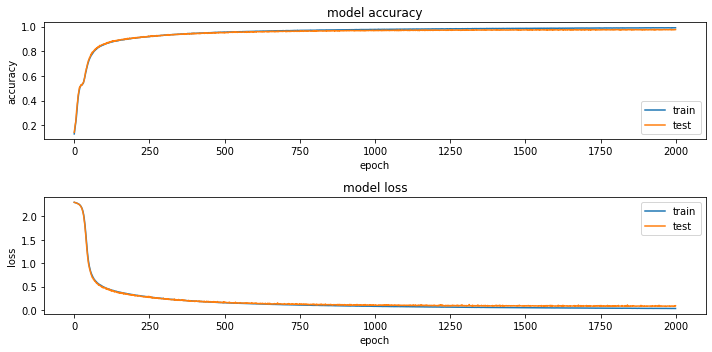

In [10]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(train_acc_all)
plt.plot(test_acc_all)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_loss_all)
plt.plot(test_loss_all)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train'], loc='upper right')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [11]:
torch.save(mlp, "mlp.pkl")
net_load = torch.load("mlp.pkl")
net_load.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=512, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.2, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)

In [12]:
for X,y in test_loader:
    break
y_hat = net_load(X)

In [13]:
y_hat[0].reshape(-1,10).shape

torch.Size([1, 10])

In [14]:
score,pred = torch.max(torch.softmax(y_hat[:10],dim = 1), 1)
score,pred,y[:10]

(tensor([0.9989, 1.0000, 1.0000, 0.9661, 0.9999, 0.9966, 0.9999, 0.6256, 1.0000,
         0.9995], grad_fn=<MaxBackward0>),
 tensor([6, 9, 6, 7, 2, 1, 8, 5, 9, 9]),
 tensor([6, 9, 6, 7, 2, 1, 8, 3, 9, 9]))

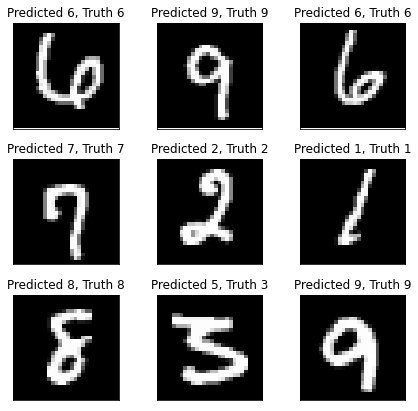

In [15]:
fig = plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Truth {}".format(pred[i],y[i]))
    plt.xticks([])
    plt.yticks([])

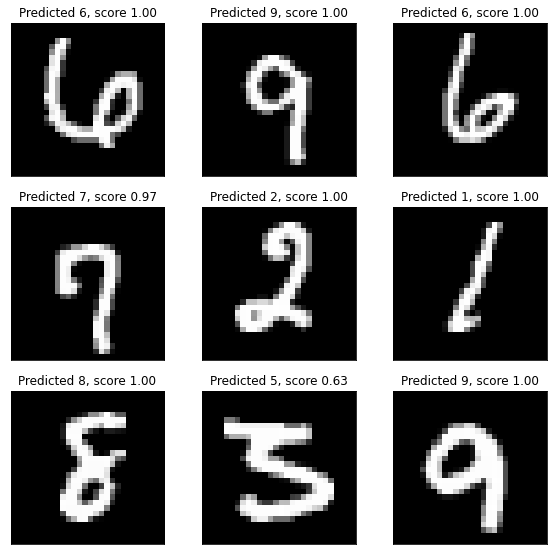

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, score {:.2f}".format(pred[i],score[i]))
    plt.xticks([])
    plt.yticks([])